# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

np.random.seed(0)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

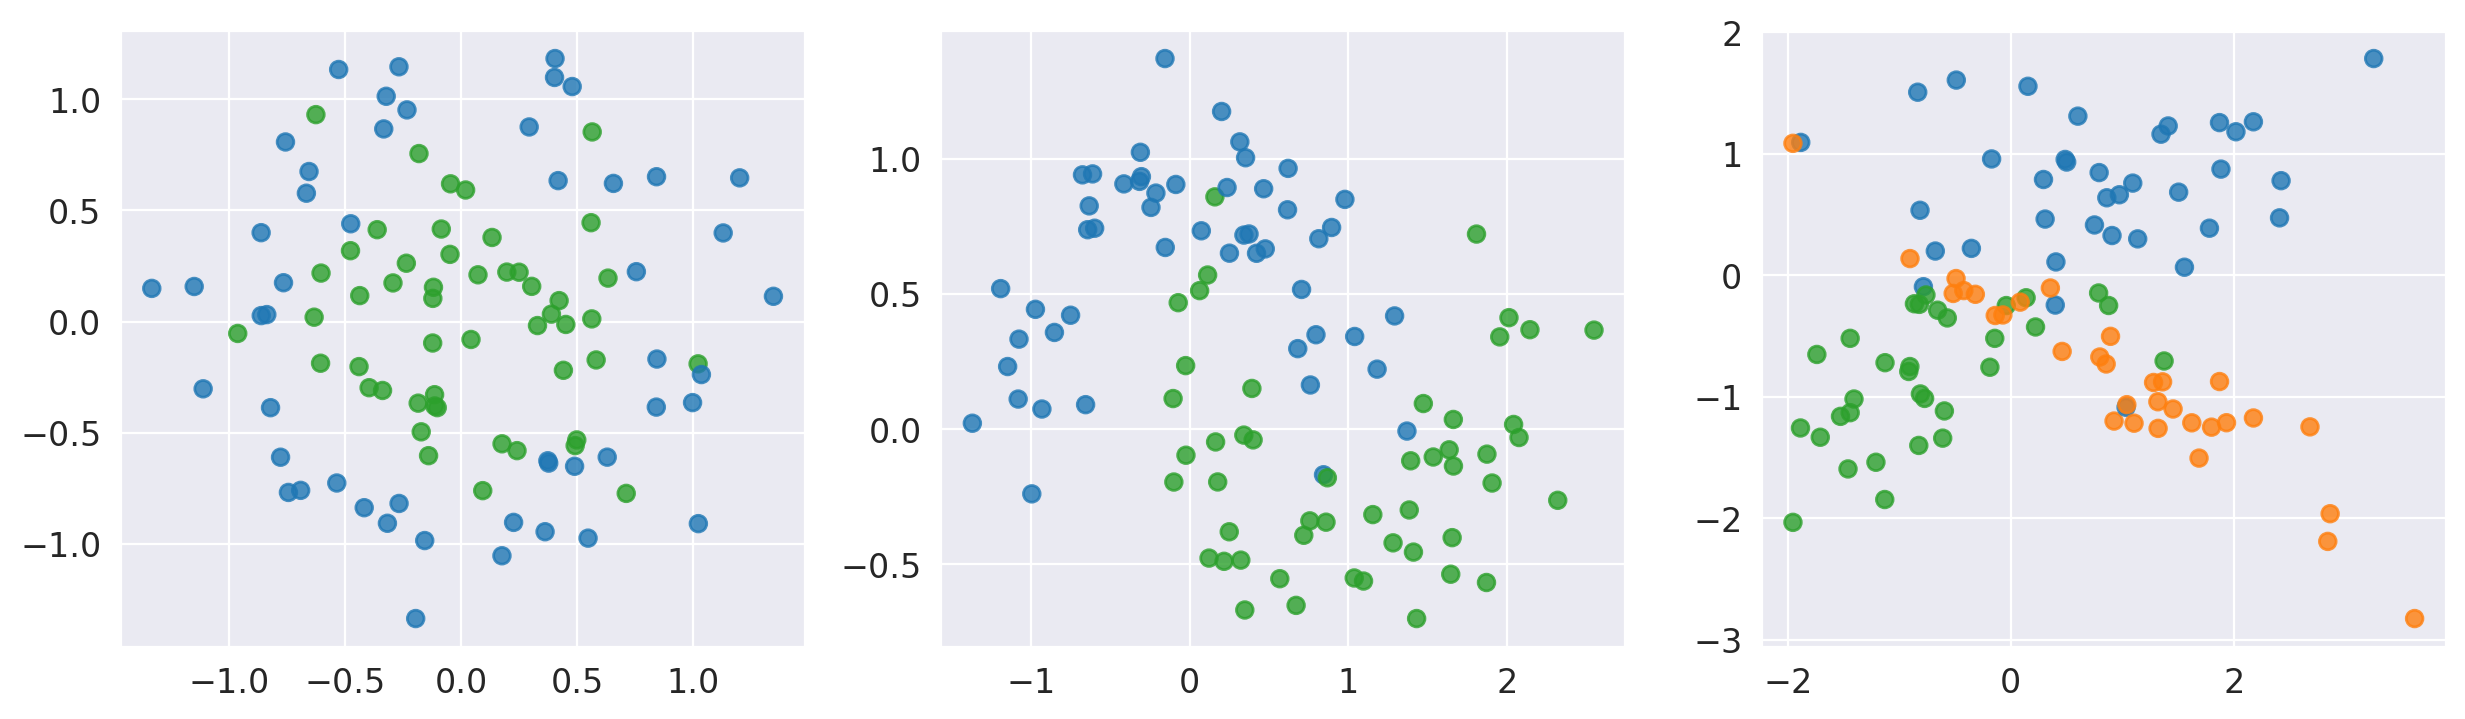

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

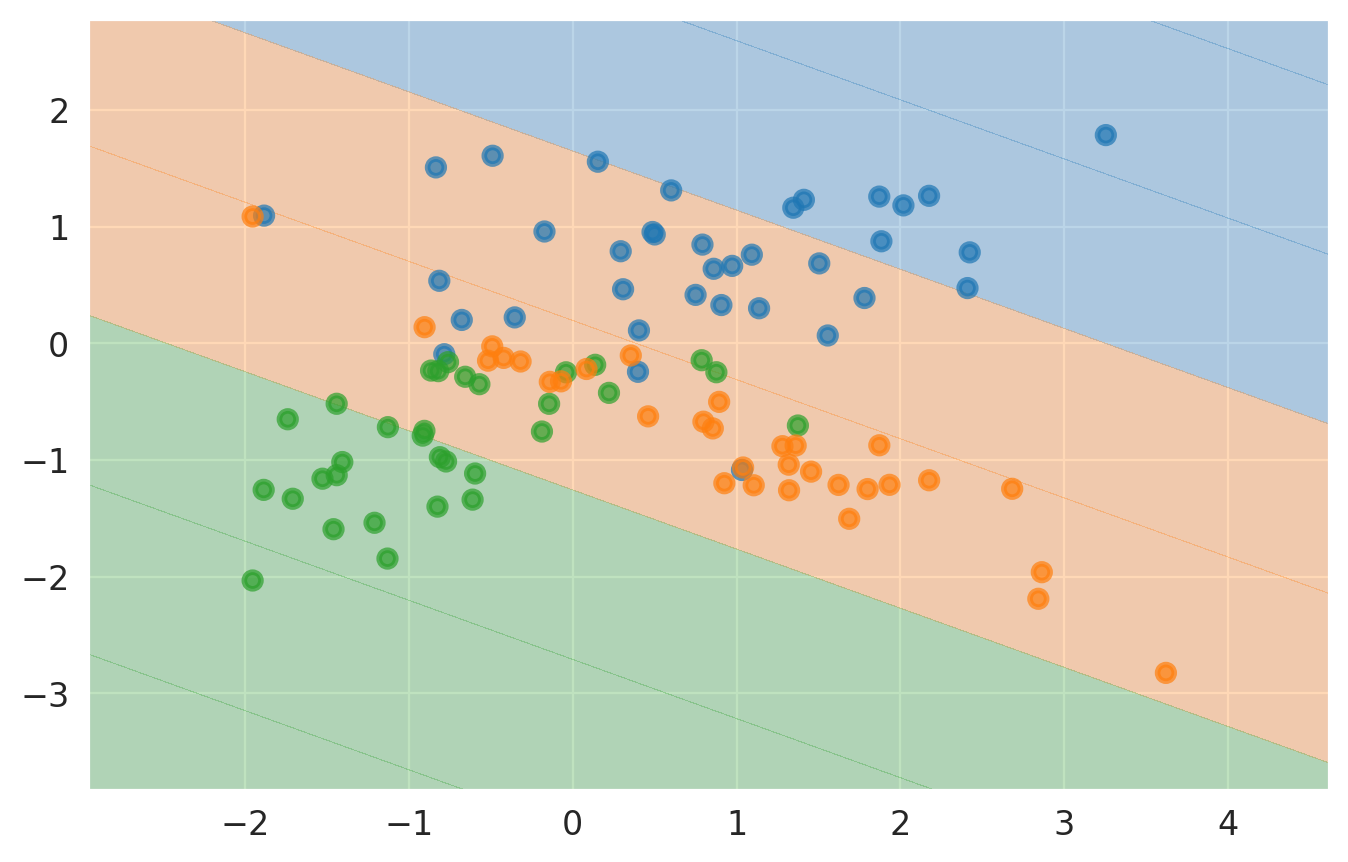

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression


X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [ ]:
data = []
for ds in datasets:
    X, y = ds
    # 70% training and 30% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    split = {
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test
    }
    data.append(split)

Accuracy: 0.7333333333333333


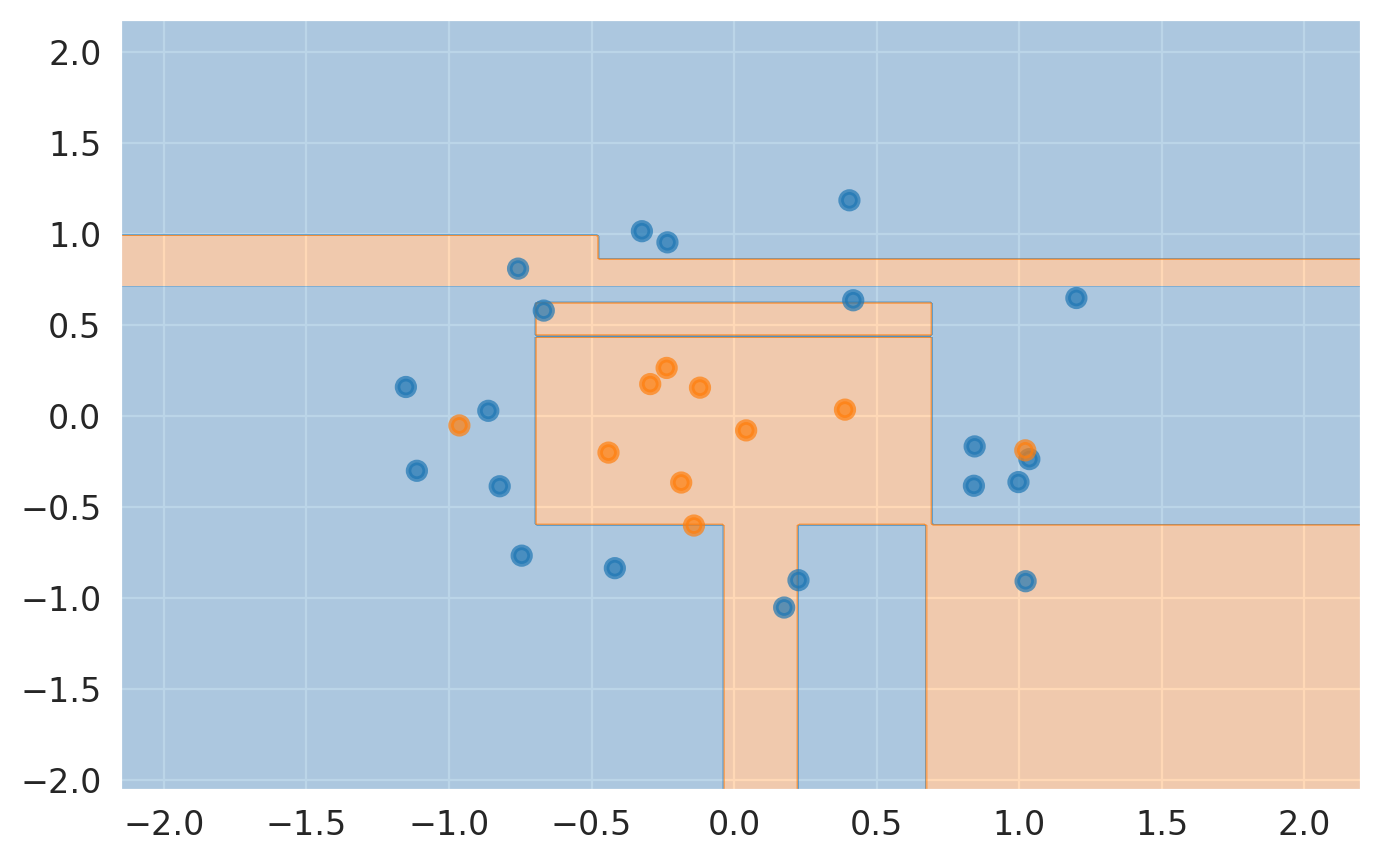

In [ ]:
# 1st dataset
X_train, X_test, y_train, y_test = [data[0][name] for name in ['X_train', 'X_test', 'y_train', 'y_test']]

clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy:", accuracy_score(y_test, y_pred))
plot_surface(clf, X_test, y_test)

Accuracy: 0.8666666666666667


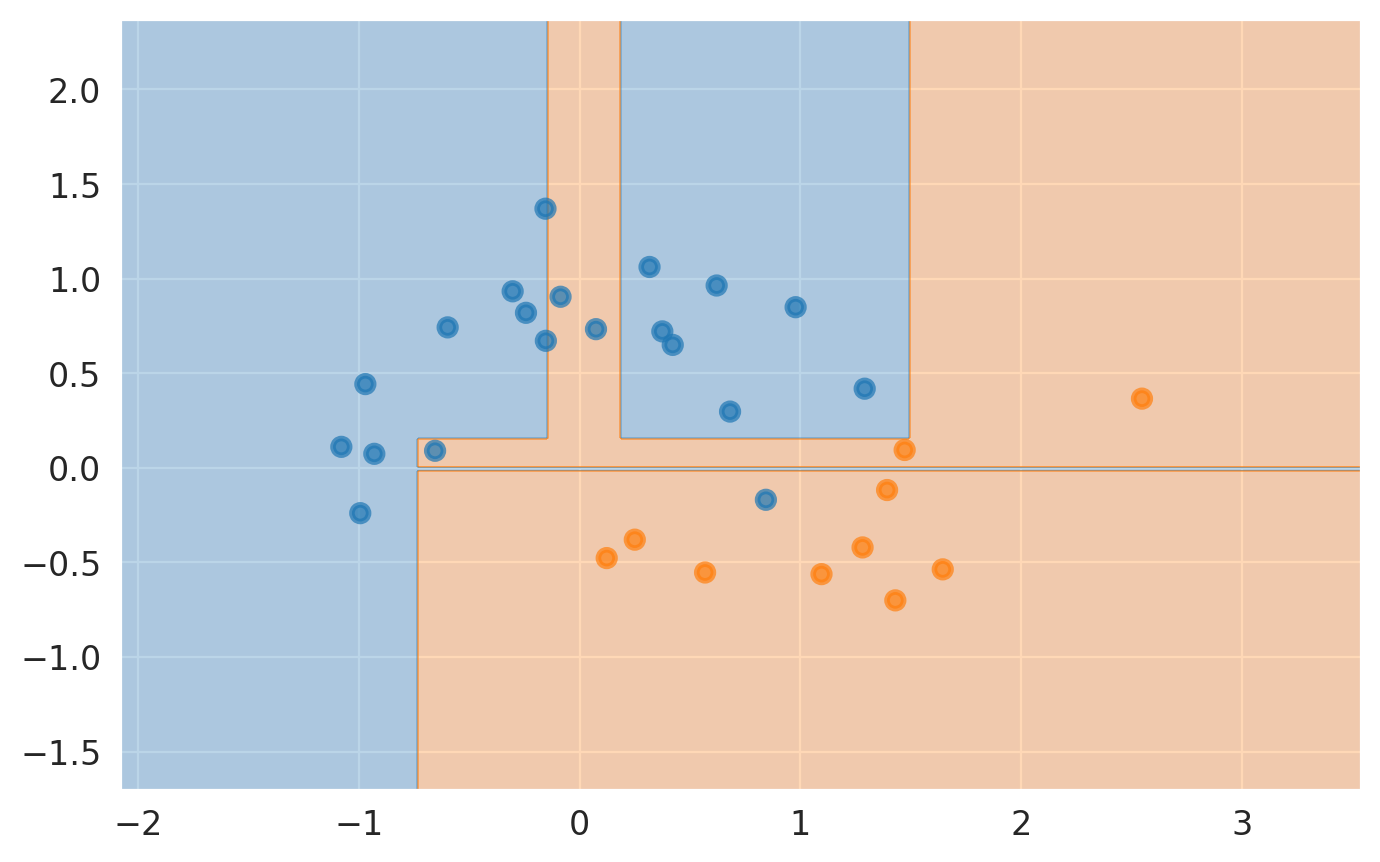

In [ ]:
# 2nd dataset
X_train, X_test, y_train, y_test = [data[1][name] for name in ['X_train', 'X_test', 'y_train', 'y_test']]

clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy:", accuracy_score(y_test, y_pred))
plot_surface(clf, X_test, y_test)

Accuracy: 0.8333333333333334


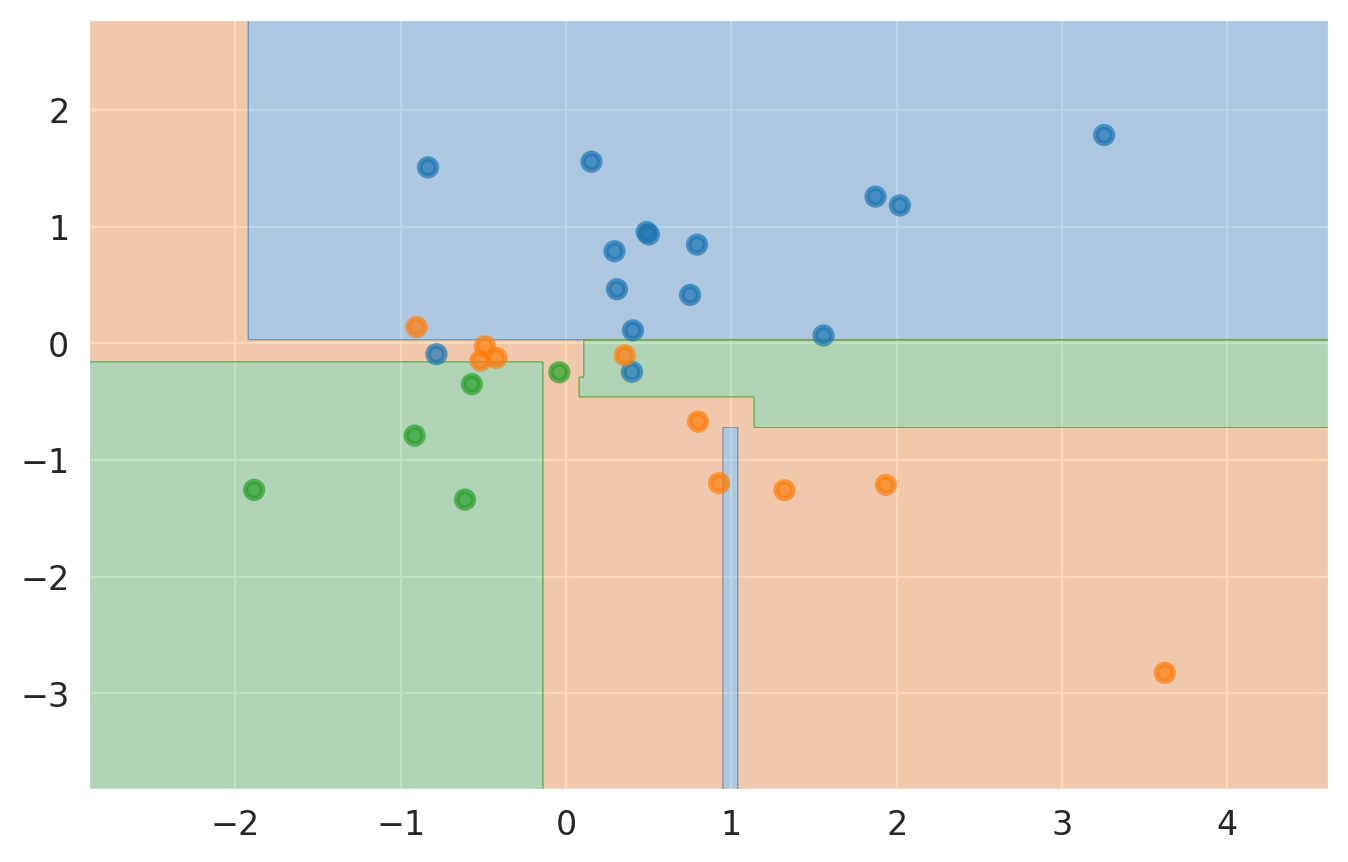

In [ ]:
# 3rd dataset
X_train, X_test, y_train, y_test = [data[2][name] for name in ['X_train', 'X_test', 'y_train', 'y_test']]

clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy:", accuracy_score(y_test, y_pred))
plot_surface(clf, X_test, y_test)

__Ответ:__ Я бы сказала, что деревья слегка переобучились. Это заметно по графикам в местах, где выделяются контрастные линии с малым кол-вом объектов

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [ ]:
import matplotlib.patches as mpatches

def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

In [ ]:
def plot_n_clfs(data):
    plt.figure(figsize=(14, 14))
    for i, max_depth in enumerate([2, 5, 15]):
        for j, min_samples_leaf in enumerate([2, 5, 20]):
            X_train, X_test, y_train, y_test = [data[name] for name in ['X_train', 'X_test', 'y_train', 'y_test']]
            clf = DecisionTreeClassifier(
                random_state=100,
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf
            )
            clf.fit(X_train,y_train)
            xx, yy = get_grid(X_train)
            predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

            plt.subplot2grid((3, 3), (i, j))
            palette = sns.color_palette(n_colors=len(np.unique(y_train)))
            cmap = ListedColormap(palette)
            plt.pcolormesh(xx, yy, predicted, cmap=cmap)
            plt.scatter(
                X_train[:, 0],
                X_train[:, 1],
                c=y_train, s=30,
                cmap=cmap,
                edgecolor='k'
            )

            y_pred = clf.predict(X_train)
            red_patch = mpatches.Patch(color='red', label=f'Train_acc {accuracy_score(y_train, y_pred)}')
            y_pred = clf.predict(X_test)
            blue_patch = mpatches.Patch(color='blue', label=f'Test_acc {accuracy_score(y_test, y_pred)}')
            plt.legend(handles=[red_patch, blue_patch])

            plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf), fontsize=10)

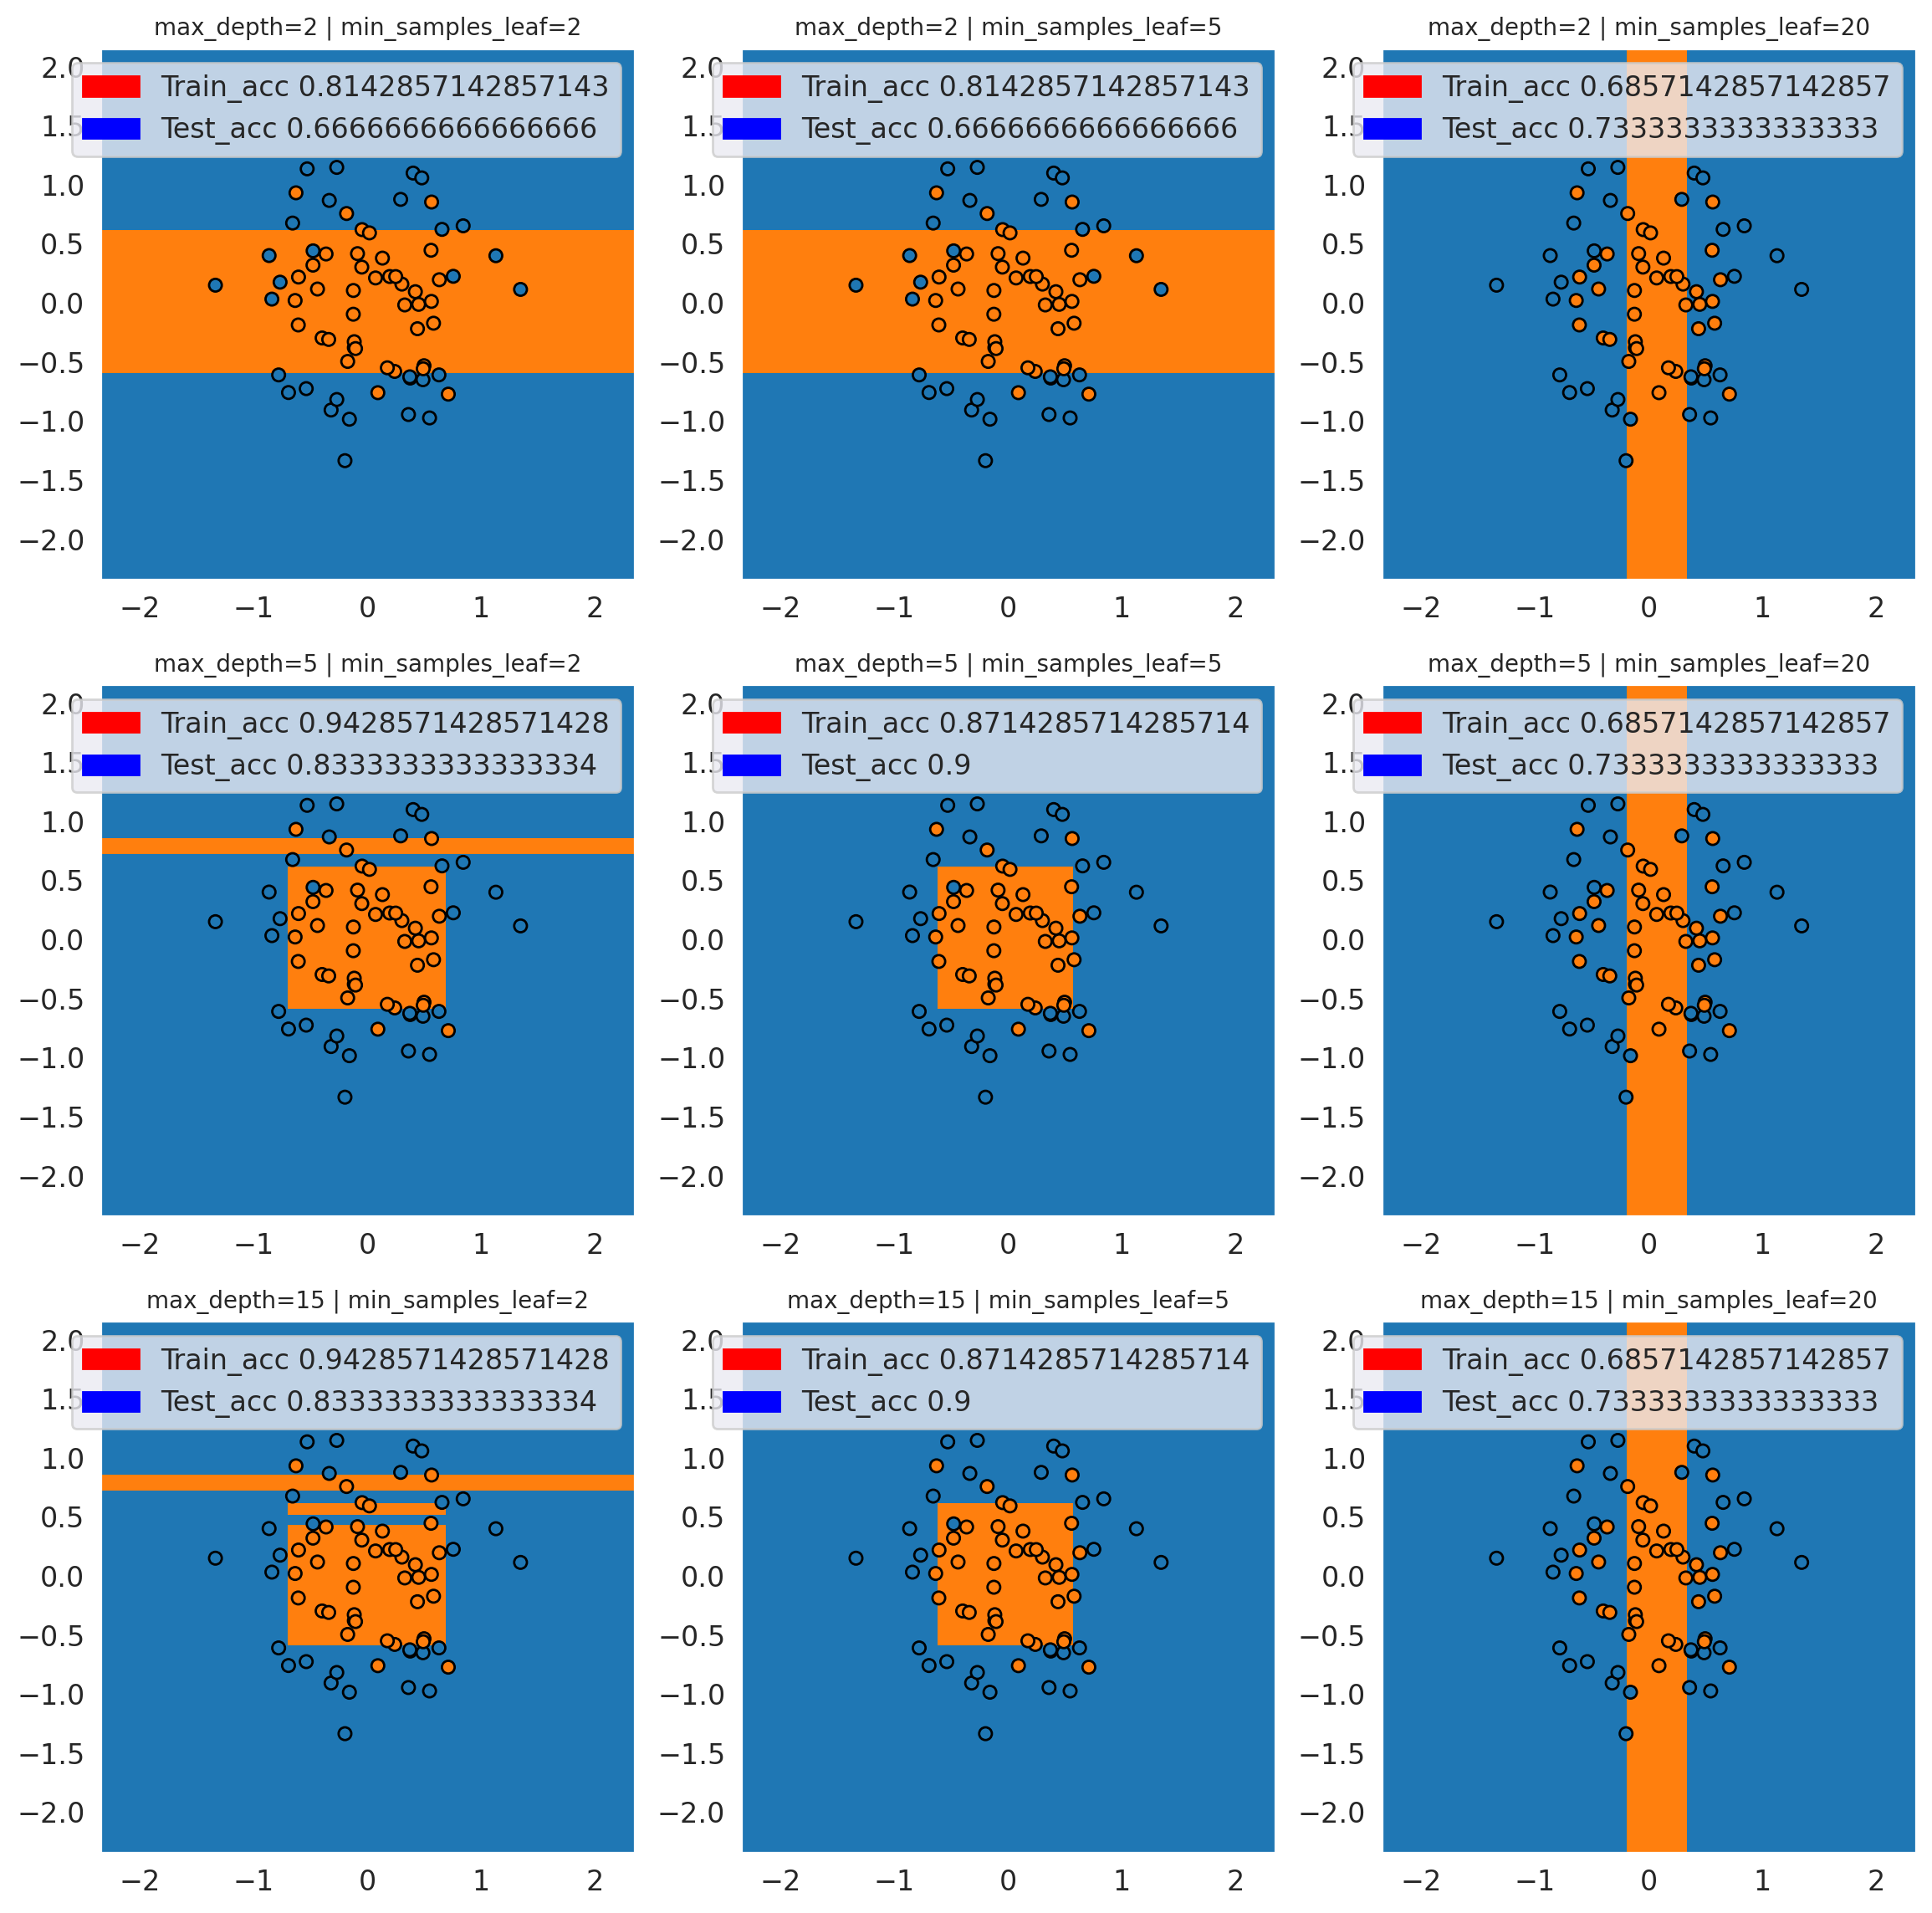

In [ ]:
plot_n_clfs(data[0])

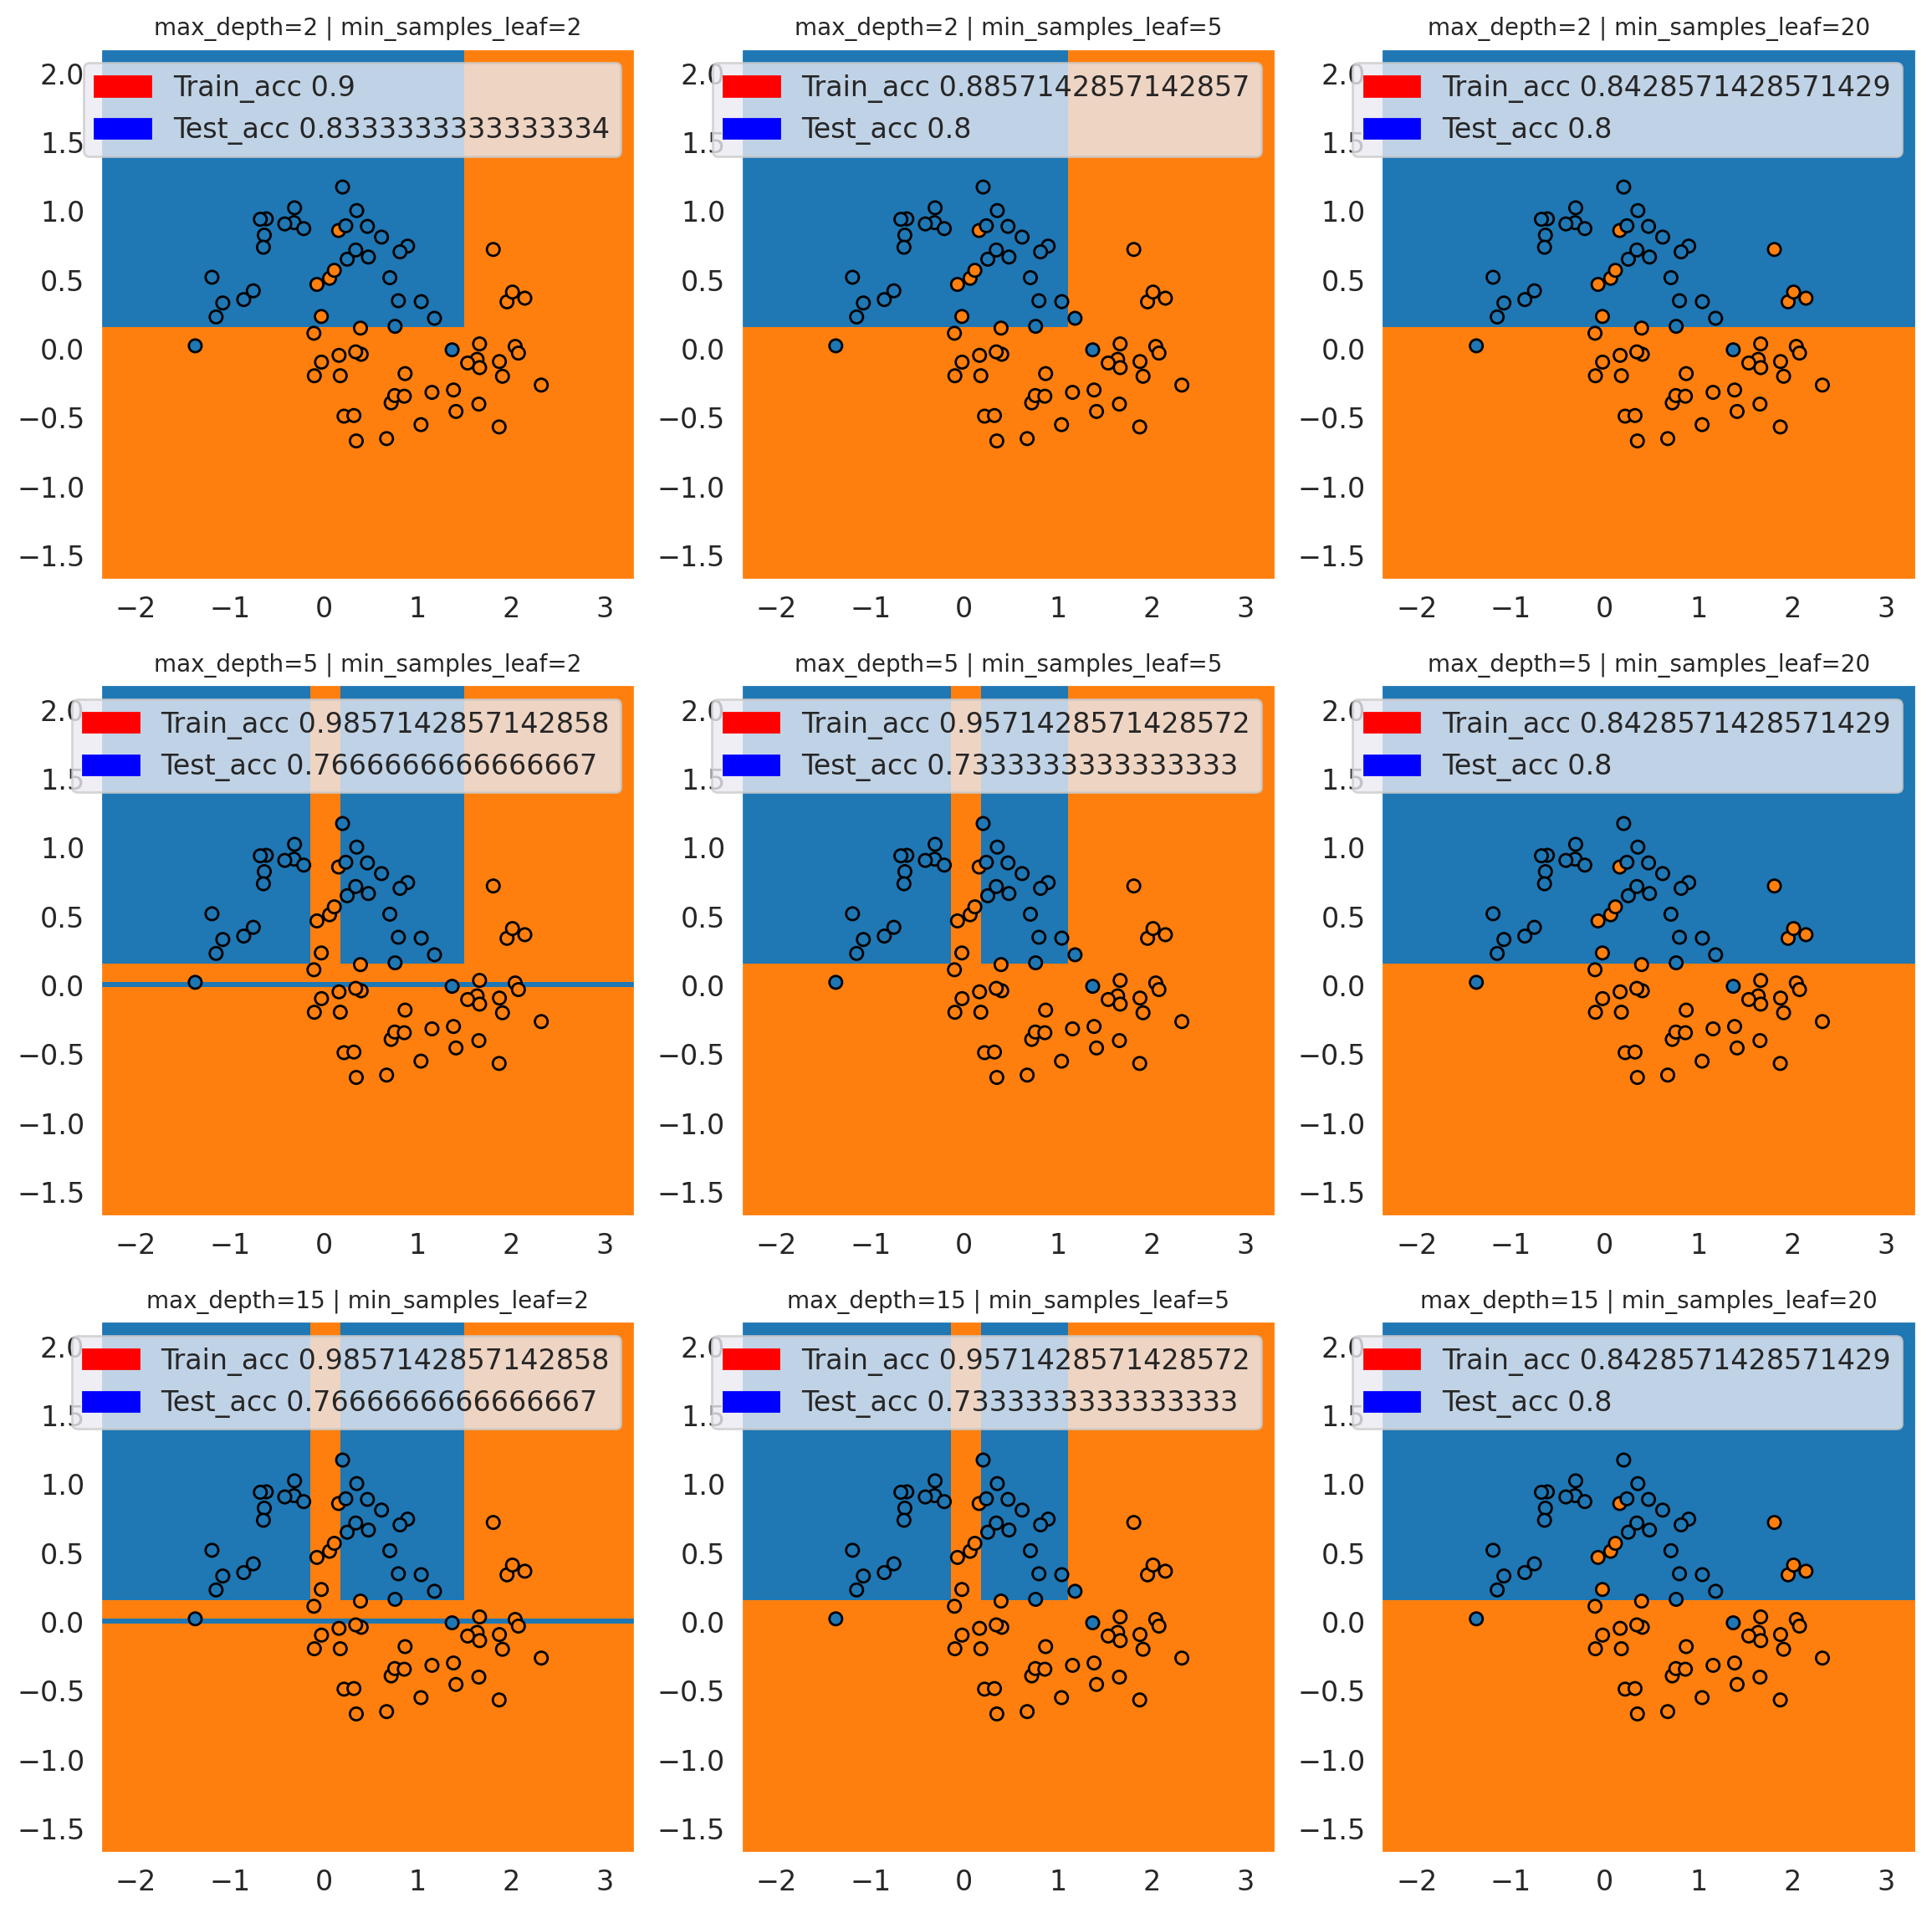

In [ ]:
plot_n_clfs(data[1])

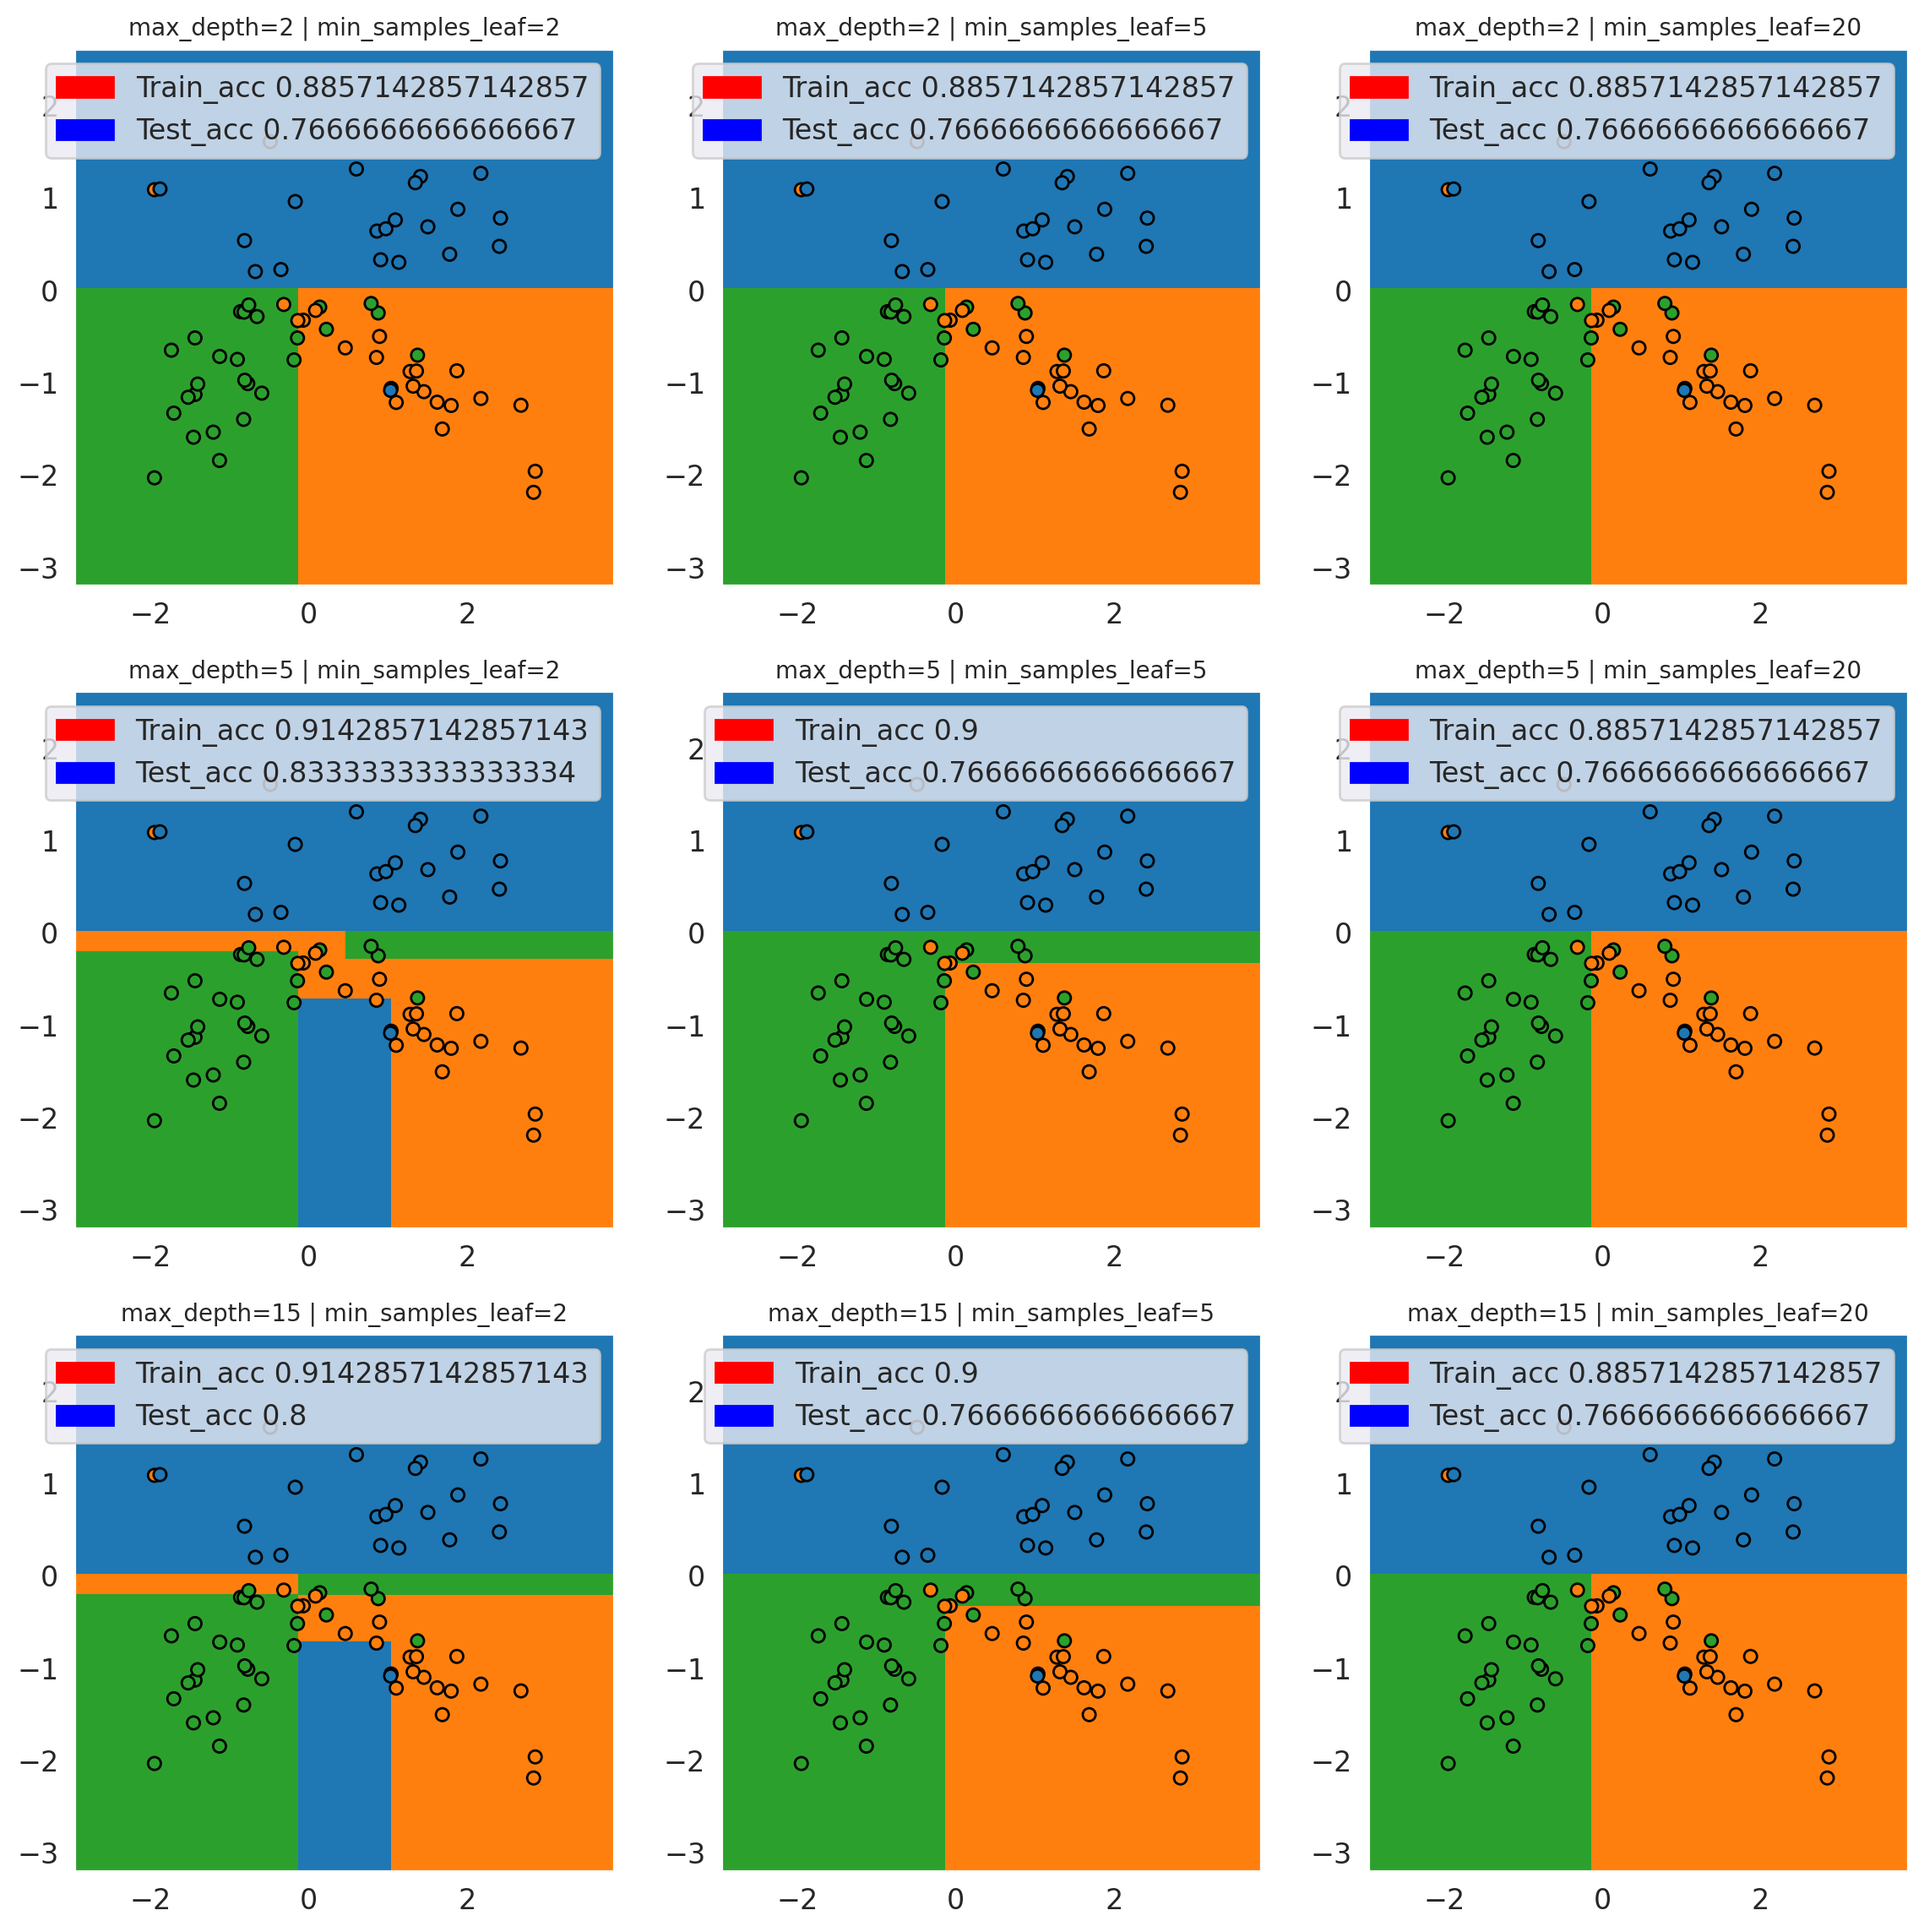

In [ ]:
plot_n_clfs(data[2])

__Ответ:__
Результаты для всех датасетов примерно одинаковые: чем больше глубина дерева и меньше минимальное кол-во листьев, тем переобученнее  разделяющая поверхность. Также отметим, что графики для различных max_depth и одинаковых min_samples _leaf идентичны - это связано с тем, что дереву даже не приходится соблюдать ограничение на максимальную глубину, тк все данные успешно помещаются в листьях соответственно наложенному ограничению

Правдоподобно выглядят разделяющие поверхности графиков с max_depth = 5 и min_samples_leaf = 5

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Посылка__: https://contest.yandex.ru/contest/56884/run-report/102520211/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv')
df.head(2)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.0,0.00,0.0,0
1,0.08,0.08,0.1,0.24,0.9,1


In [ ]:
target_name = 'UNS'

X = df.drop(target_name, axis=1)
y = df[target_name]

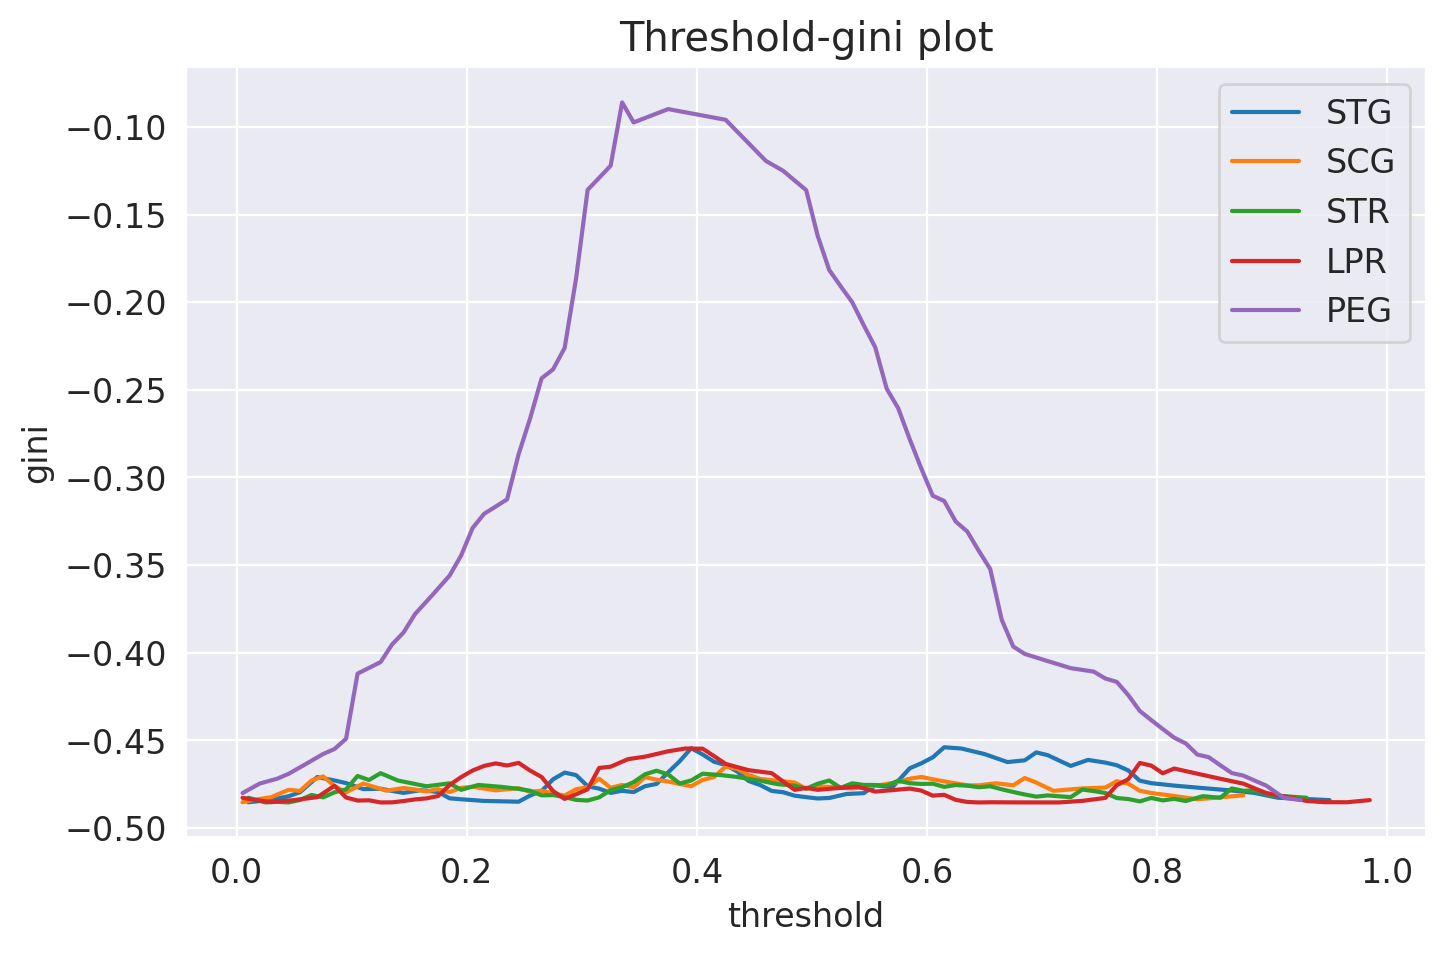

In [ ]:
from hw5code import find_best_split


for i, col_name in enumerate(X.columns):
    feature, target = X[col_name].to_numpy(), y.to_numpy()
    thresholds, ginis, threshold_best, gini_best = find_best_split(feature, target)
    plt.plot(thresholds, ginis, label=col_name)

plt.xlabel('threshold')
plt.ylabel('gini')
plt.title('Threshold-gini plot')

plt.legend()
plt.show()

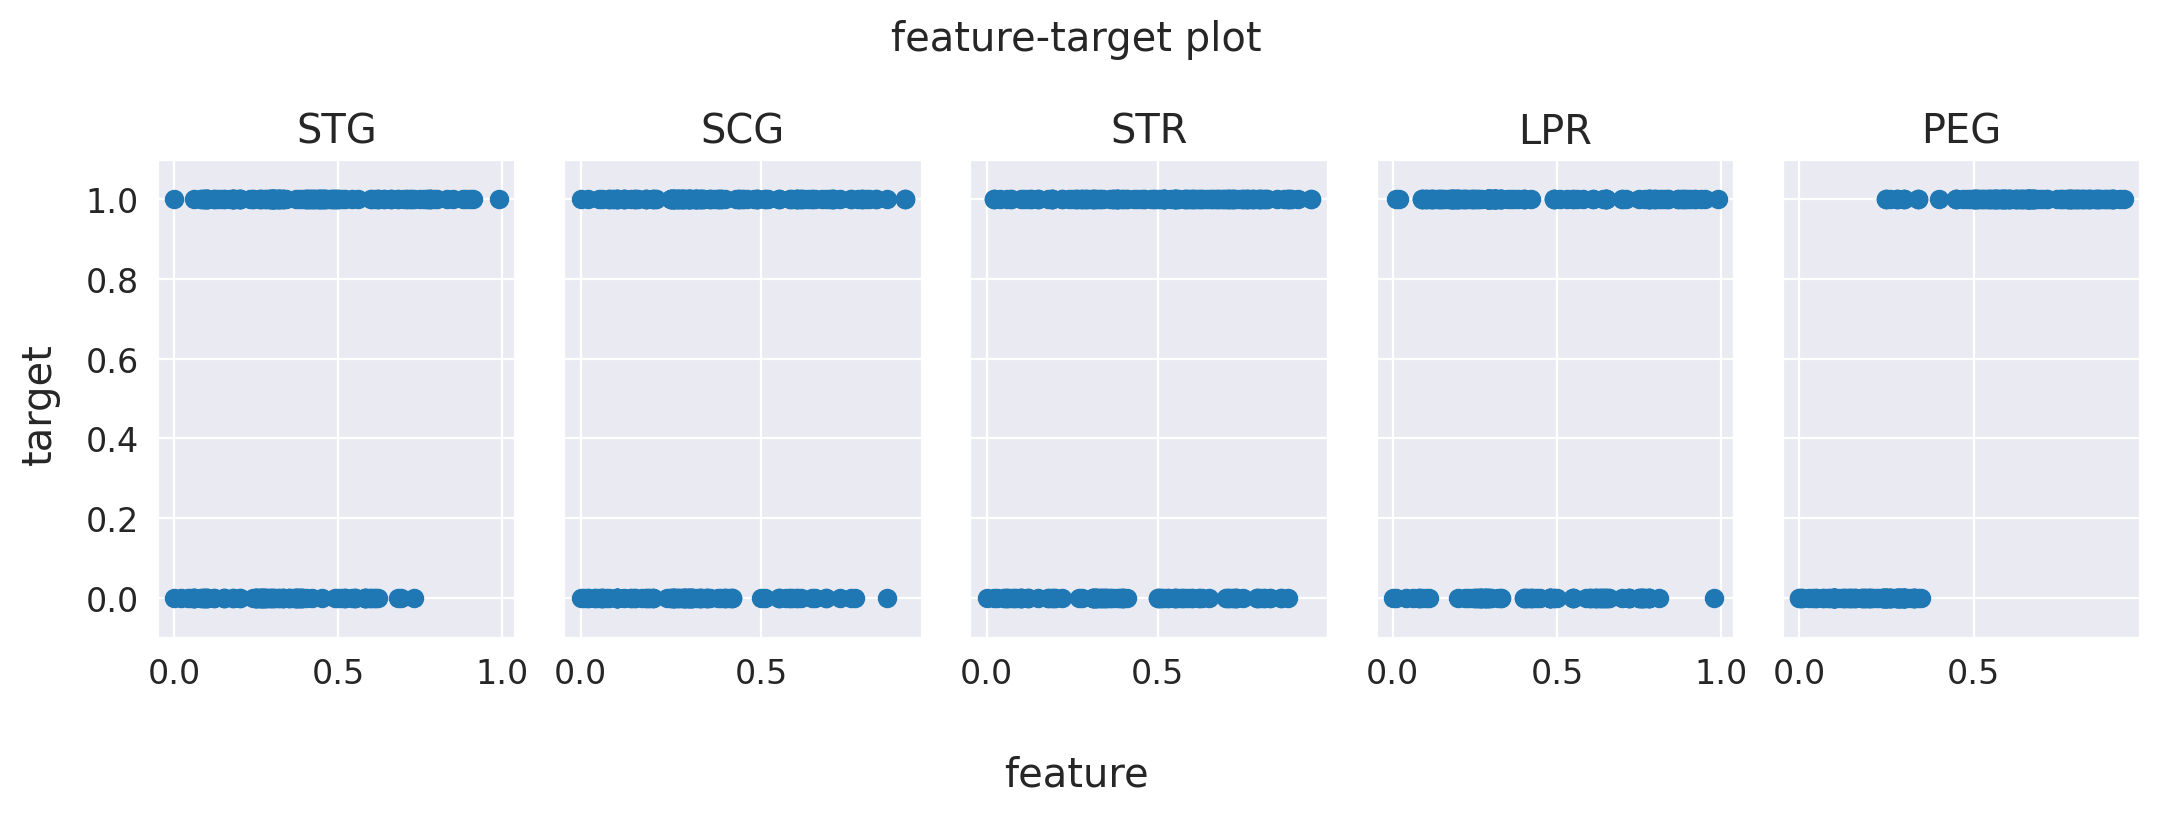

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(11, 4), sharey=True)

for i, col_name in enumerate(X.columns):
    feature, target = X[col_name].to_numpy(), y.to_numpy()

    axs[i].scatter(feature, target)
    axs[i].set_title(col_name)
    axs[i].set_ylim([-0.1, 1.1])


fig.supxlabel('feature')
fig.supylabel('target')
fig.suptitle('feature-target plot')

fig.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

Исходя из значений кривых критерия Джини, необходимо производить деление выборки на два поддерева по **критерию PEG**, так как на графике прослеживается четкое наличие порога (≈0.4) для максимизации критерия Джини (информативности).

Данный результат согласуется с визуальной оценкой диаграмм рассеяиния. Критерий PEG имеет наиболее четкое распределение значений по двум классам среди остальных критериев.

Кривая для "хороших" бинарных признаков представляет собой выпуклую функцию с единственным максимумом, что позволяет однозначно разделить выборку по порогу. В общем случае на графике должен быть виден ярко выраженный максимум по оси ординат.

Кривые для признаков, по которым деление практически невозможно, характеризуются наличием множетсва максимумов функции, колеблющихся в одном малом диапазоне



__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Посылка__: https://contest.yandex.ru/contest/56884/run-report/102580134/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

In [ ]:
from hw5code import DecisionTree

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, make_scorer


y[y == 'e'] = 1
y[y == 'p'] = 0

encoder = LabelEncoder()
for name in X.columns:
    X[name] = encoder.fit_transform(X[name])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
X_train, X_test = X_train.to_numpy(), X_test.to_numpy()
y_train, y_test = y_train['poisonous'].to_numpy().astype(int), y_test['poisonous'].to_numpy().astype(int)

In [ ]:
feature_types = ['categorical'] * len(X.columns)
clf = DecisionTree(feature_types=feature_types)
clf.fit(X_train, y_train)

print(f'Accuracy for test = {accuracy_score(y_test, clf.predict(X_test))}')

Accuracy for test = 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [ ]:
import numpy as np
from collections import Counter


def H(p1):
    return 1 - p1 ** 2 - (1 - p1) ** 2


def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """

    sort_idx = np.argsort(feature_vector)
    sort_features = feature_vector[sort_idx]
    sort_target = target_vector[sort_idx]

    thresholds_ = (sort_features + np.roll(sort_features, -1))[:-1] / 2

    cnt_objects = sort_features.shape[0]
    left_proportion = np.arange(1, cnt_objects + 1) / cnt_objects
    right_proportion = 1 - left_proportion

    prefix_sum = np.cumsum(sort_target)
    pos_idx_left = np.cumsum(np.unique(sort_features, return_counts=True)[1][:-1]) - 1
    p1_left = prefix_sum[pos_idx_left] / (pos_idx_left + 1)
    right_objects_cnt = cnt_objects - pos_idx_left - 1
    p1_right = (prefix_sum[-1] - prefix_sum[pos_idx_left]) / right_objects_cnt

    ginis = -left_proportion[pos_idx_left] * H(p1_left) - right_proportion[pos_idx_left] * H(p1_right)
    # константный вектор признаков
    if ginis.shape[0] == 0:
        return sort_features, np.array([0]), sort_features[0], 0

    best_index = np.argmax(ginis)
    thresholds_ = thresholds_[pos_idx_left]

    return thresholds_, ginis, thresholds_[best_index], ginis[best_index]


class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            if np.unique(feature_vector).shape[0] == 1:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]

        x_j = x[node["feature_split"]]
        if self._feature_types[node['feature_split']] == 'real':
            t = node["threshold"]
            condition = x_j < t
        else:
            t = node['categories_split']
            condition = x_j in t

        return self._predict_node(x, node["left_child"]) if condition else self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

    def get_params(self, deep=True):
        return {
            "feature_types": self._feature_types,
            "max_depth": self._max_depth,
            "min_samples_split": self._min_samples_split,
            "min_samples_leaf": self._min_samples_leaf
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
!unzip /content/nursery.zip
!unzip /content/tic+tac+toe+endgame.zip
!unzip //content/car+evaluation.zip

Archive:  /content/nursery.zip
replace nursery.c45-names? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/tic+tac+toe+endgame.zip
replace Index? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  //content/car+evaluation.zip
  inflating: car.c45-names           
  inflating: car.data                
  inflating: car.names               


In [ ]:
dataframes = {
    'mushrooms': '/content/agaricus-lepiota.data',
    'tic-tac-toe': '/content/tic-tac-toe.data',
    'cars': '/content/car.data',
    'nursery': '/content/nursery.data'
}

In [ ]:
res_metrics = pd.DataFrame(
    columns=['DT-real', 'DT-cat', 'DT-real-OHE', 'sklearn-DT'],
    index=['mushrooms', 'tic-tac-toe', 'cars', 'nursery'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder


for df_name in res_metrics.index:
    X = pd.read_csv(dataframes[df_name], sep=',')

    if df_name == 'mushrooms':
        target_name = X.columns[0]
        y = X[target_name]
        y[y == 'e'] = 1
        y[y == 'p'] = 0
        X.drop(columns=[target_name], inplace=True)
    elif df_name == 'tic-tac-toe':
        target_name = X.columns[-1]
        y = X[target_name]
        y[y == 'negative'] = 1
        y[y == 'positive'] = 0
        X.drop(columns=[target_name], inplace=True)
    elif df_name == 'cars':
        target_name = X.columns[-1]
        y = X[target_name]
        y[(y == 'unacc') | (y == 'acc')] = 0
        y[(y == 'good') | (y == 'vgood')] = 1
        X.drop(columns=[target_name], inplace=True)
    else:
        target_name = X.columns[-1]
        y = X[target_name]
        y[(y == 'not_recom') | (y == 'recommend')] = 0
        y[(y == 'very_recom') | (y == 'priority') | (y == 'spec_prior')] = 1
        X.drop(columns=[target_name], inplace=True)

    for approach in res_metrics.columns:
        encoder = LabelEncoder()
        ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

        if approach == 'DT-real':
            for name in X.columns:
                X[name] = encoder.fit_transform(X[name])
            feature_types = ['real'] * len(X.columns)
            clf = DecisionTree(feature_types=feature_types)
        elif approach == 'DT-cat':
            for name in X.columns:
                X[name] = encoder.fit_transform(X[name])
            feature_types = ['categorical'] * len(X.columns)
            clf = DecisionTree(feature_types=feature_types)
        elif approach == 'DT-real-OHE':
            X = ohe.fit_transform(X)
            feature_types = ['real'] * X.shape[1]
            clf = DecisionTree(feature_types=feature_types)
        else:
            clf = DecisionTreeClassifier(random_state=0)

        X_ = X
        if type(X) != np.ndarray:
            X_ = X.to_numpy()

        metrics = np.mean(cross_val_score(clf, X_, y.to_numpy().astype(int), cv=10, scoring=make_scorer(accuracy_score)))
        print(f'Mean accuracy for {df_name} with {approach} = {metrics}')
        res_metrics.loc[df_name][approach] = metrics

Mean accuracy for mushrooms with DT-real = 0.9992610837438424
Mean accuracy for mushrooms with DT-cat = 1.0
Mean accuracy for mushrooms with DT-real-OHE = 0.9996305418719211
Mean accuracy for mushrooms with sklearn-DT = 0.9683883809281444
Mean accuracy for tic-tac-toe with DT-real = 0.46165570175438597
Mean accuracy for tic-tac-toe with DT-cat = 0.5577302631578946
Mean accuracy for tic-tac-toe with DT-real-OHE = 0.5524671052631579
Mean accuracy for tic-tac-toe with sklearn-DT = 0.8151864035087719
Mean accuracy for cars with DT-real = 0.9425998118026616
Mean accuracy for cars with DT-cat = 0.9675191558005108
Mean accuracy for cars with DT-real-OHE = 0.9211856432316171
Mean accuracy for cars with sklearn-DT = 0.8322086301922302
Mean accuracy for nursery with DT-real = 0.9998456790123458
Mean accuracy for nursery with DT-cat = 0.9999228395061728
Mean accuracy for nursery with DT-real-OHE = 0.9997685185185186
Mean accuracy for nursery with sklearn-DT = 0.9998456790123458


In [ ]:
res_metrics

,DT-real,DT-cat,DT-real-OHE,sklearn-DT
mushrooms,0.999261,1.0,0.999631,0.968388
tic-tac-toe,0.461656,0.55773,0.552467,0.815186
cars,0.9426,0.967519,0.921186,0.832209
nursery,0.999846,0.999923,0.999769,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

*   Заметим при сравнении алгоритма самописного решающего дерева с вещественными и категориальными признаки лучше работает с категориями (для tic-tac-toe разница достигает 9%). Да и в целом алгоритм с восприятием признаков как категорий имеет лучшие метрики нежели OHE or real
*   DecisionTreeClassifier из sklearn доминирует только в случае с датасетом tic-tac-toe (зато очень значительно). В остальных случаях он уступает, в 3ей строчке даже очень сильно (это связано с тем что дерево перестает корректно описывать зависимости между данными)
*   Думаю невысокие метрики Tic-Tac-Toe связаны еще с отсутсвием линейной корреляции между признаками и таргетом. То есть дерево в целом не может корректно описать нелинейные зависимости, не использую встроенных механизмов борьбы с такой ситуацией
*   Метрики межно увеличить в некоторых случаях посредством более изощренного отбора признаков/кодирования. Что касается случайности, то здесь она весьма маловероятна, особенно еслии зафиксировать везде рандом сиды) мы отбираем признаки по критерию, который однозначен, а значит и деление на поддеревья тоже







Вставьте что угодно, описывающее ваши впечатления от этого задания: